# Inferential Statistics Assignment

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statistics 

%matplotlib inline

In [ ]:
data_url = 'https://docs.google.com/spreadsheets/d/1uWH8kic9eW53I7BqNpgDKCz2hWYQSbIrI73q9JR_sag/export?format=csv'

### Read the customer churn data set into a Pandas data frame.

In [ ]:
churn = pd.read_csv(data_url)
churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,Male,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.50,0
2,2,Male,0,1,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,Male,0,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,Female,0,1,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
churn.describe()

,CustomerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.162400,0.592719,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,2030.107879,0.368844,0.491363,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,3515.500000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,5273.250000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,7031.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


### Generate a histogram that shows the data distribution of the MonthlyCharges field in the data.

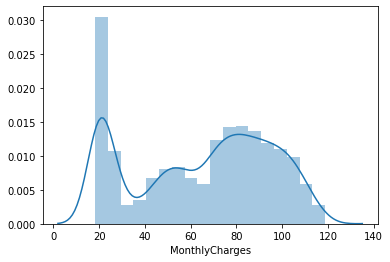

In [ ]:
sns.distplot(churn['MonthlyCharges'])

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the MonthlyCharges field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [ ]:
rnd_sample = churn.sample(1000)
rnd_sample['MonthlyCharges'].mean()

64.73985000000005

### Bootstrap a sampling distribution for MonthlyCharges field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

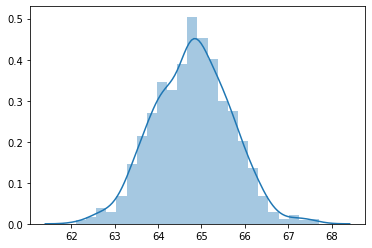

In [ ]:
samples1 = []
for _ in range(1000):
    rnd_sample = churn.sample(1000)
    samples1.append(rnd_sample['MonthlyCharges'].mean())

sns.distplot(samples)
plt.show()

[64.82469285714296, 64.77917857142825, 64.76744285714302, 64.77369285714275, 64.86145000000018, 64.78468571428571, 64.77477142857148, 64.82075000000003, 64.83569285714273, 64.79757142857132, 64.76553571428578, 64.76830714285694, 64.76929999999983, 64.74748571428562, 64.79428571428562, 64.82177857142847, 64.8058214285712, 64.80432857142847, 64.81580000000001, 64.77987142857144, 64.78409285714267, 64.80538571428563, 64.79675714285703, 64.79239285714266, 64.79489285714257, 64.81466428571417, 64.78558571428549, 64.80946428571414, 64.78384285714264, 64.8042999999998, 64.79240000000004, 64.82504999999979, 64.80635714285702, 64.79969285714277, 64.78733571428563, 64.75934285714276, 64.80389285714264, 64.79767142857138, 64.82765000000002, 64.76916428571398, 64.76644999999989, 64.78016428571422, 64.7868928571428, 64.79214285714282, 64.79518571428545, 64.80768571428557, 64.80395714285724, 64.79716428571422, 64.8011857142857, 64.79384999999975, 64.81835000000004, 64.82255, 64.78050714285709, 64.78

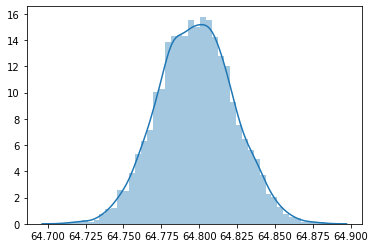

In [ ]:
samples2 = []
for _ in range(5000):
    rnd_sample = churn.sample(7000)
    samples2.append(rnd_sample['MonthlyCharges'].mean())

print(samples2)
sns.distplot(samples2)
plt.show()

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of churn rates that may have resulted in the observed amount of churn we see in the data.

In [ ]:
churn['Churn'].mean()

0.26578498293515357

In [ ]:
obs_n_churn = churn['Churn'].sum()
n_customers = churn['CustomerID'].nunique()
obs_rate = churn['Churn'].mean()
print(f'{obs_n_churn} {n_customers} {obs_rate}')

1869 7032 0.26578498293515357


In [ ]:
valid_rates = []

for _ in range(100000):
    # Prior
    rate = np.random.beta(1, 1)

    # Generative process
    gen_n_churn = np.random.binomial(n_customers, rate)

    if gen_n_churn == obs_n_churn:
        valid_rates.append(rate)

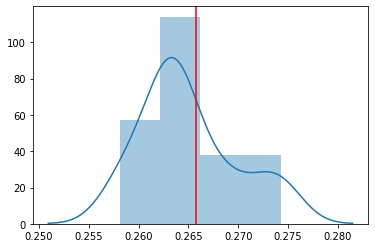

In [ ]:
sns.distplot(valid_rates)
plt.axvline(obs_rate, c='r')
plt.show()

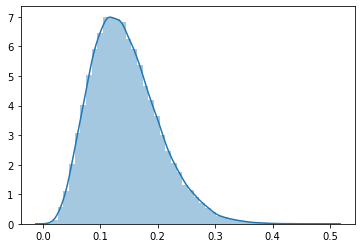

In [ ]:
alpha = 5
beta = 30

sns.distplot(np.random.beta(alpha, beta, 100000))
plt.show()

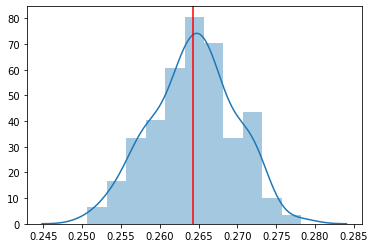

In [ ]:
valid_rates = []

for _ in range(1000000):
    # Prior
    rate = np.random.beta(alpha, beta)

    # Generative process
    gen_n_churn = np.random.binomial(n_customers, rate)

    if gen_n_churn == obs_n_churn:
        valid_rates.append(rate)

# Plot the posterior
sns.distplot(valid_rates)
plt.axvline(statistics.mean(valid_rates), c='r')
plt.show()

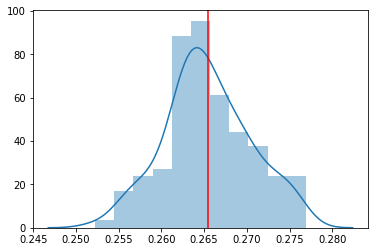

In [ ]:
from tqdm.notebook import tqdm

valid_rates = []

for _ in tqdm(range(1000000)):
    # Prior
    rate = np.random.beta(alpha, beta)

    # Generative process
    gen_n_churn = np.random.binomial(n_customers, rate)

    if gen_n_churn == obs_n_churn:
        valid_rates.append(rate)

# Plot the posterior
sns.distplot(valid_rates)
plt.axvline(statistics.mean(valid_rates), c='r')
plt.show()